In [23]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [24]:
import statsmodels.api as sm

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [26]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [27]:
A = np.array([3, 5, 11])

In [28]:
A.sum()

19

In [29]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [30]:
# lstat is percent of households iwth low socioeconomic status
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [31]:
# medv is the median house value
y = Boston['medv']
model = sm.OLS(y, X) # this does not fit the model but only specifies it
results = model.fit() # this fits the model
# by regressing median house value on percent of households with low economic status we want to see how economic status affects house prices

In [32]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [33]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [34]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [35]:
# summary from the statsmodels library
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           5.08e-88
Time:                        05:44:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# fitted params
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [37]:
# make predictions
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [38]:
# function to get predictions
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [39]:
# confidence intervals for predicted values
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [40]:
# prediction intervals
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [41]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

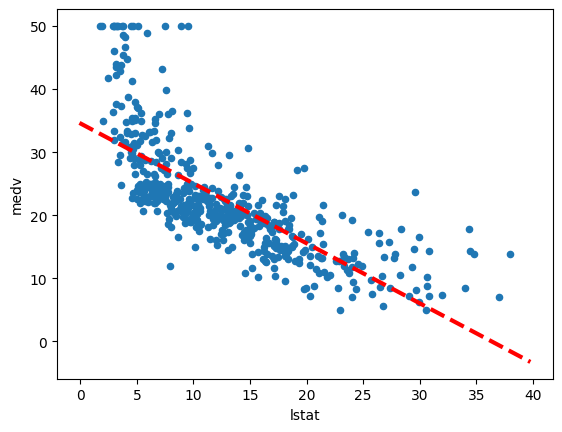

In [42]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(
    ax, 
    results.params[0], # intercept
    results.params[1], # lstat
    'r--',
    linewidth=3
)

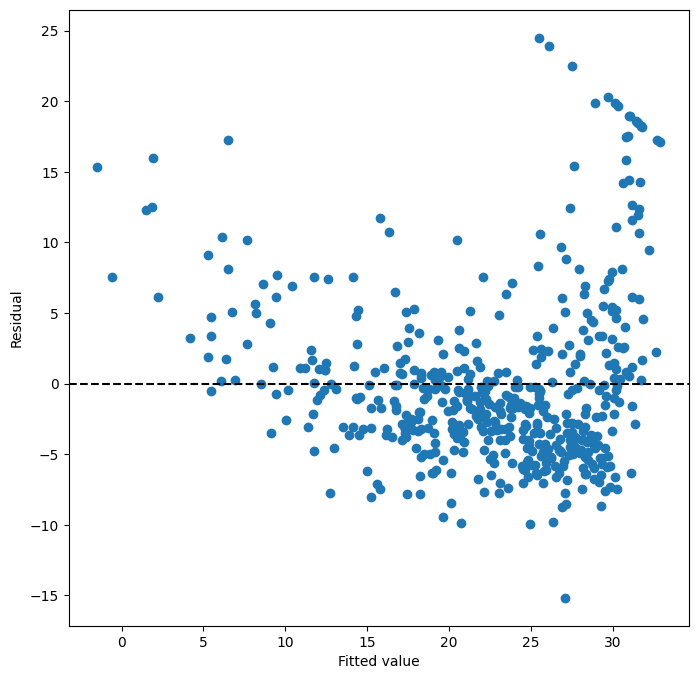

In [43]:
# diagnostic plots e.g. residuals
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

374

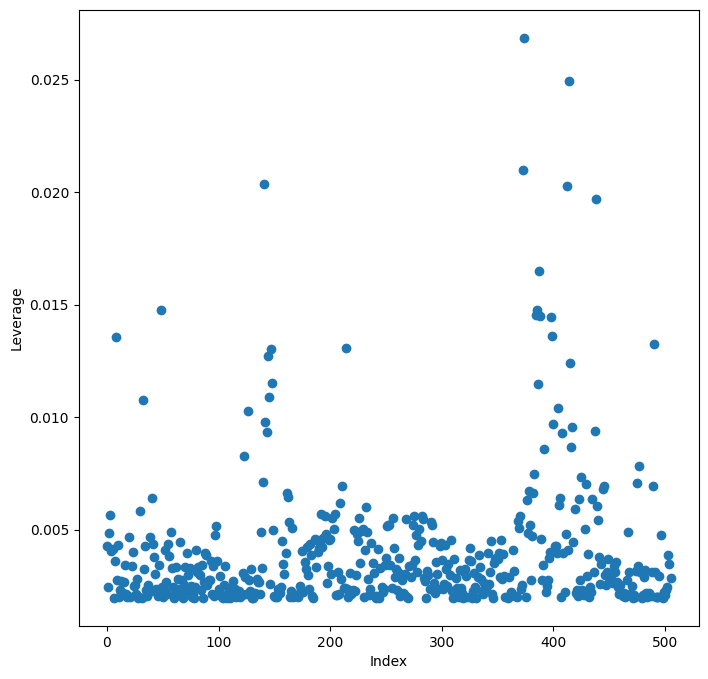

In [46]:
# diagnostic: leverage statistics
# recall: leverage refers to predictors which have undue influence on the prediction
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
# this highlights a point of high leverage
#ax.plot([np.arange(X.shape[0])[arg_max]], [infl.hat_matrix_diag[arg_max]], c='r', marker='*')

In [47]:
arg_max = np.argmax(infl.hat_matrix_diag)
np.arange(X.shape[0])[arg_max], infl.hat_matrix_diag[arg_max]

(374, 0.026865166510283492)

## Multiple Linear Regression

In [48]:
X = MS(['lstat', 'age']).fit_transform(Boston)
print(y[:4])
print(X[:4])
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

0    24.0
1    21.6
2    34.7
3    33.4
Name: medv, dtype: float64
   intercept  lstat   age
0        1.0   4.98  65.2
1        1.0   9.14  78.9
2        1.0   4.03  61.1
3        1.0   2.94  45.8


,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [49]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [50]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [51]:
# from the above, 'indus' and 'age' are not significant
# we can remove them from the regression as follows
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())
# we can assess the goodness of fit by viewing the values of results1.rsquared and np.sqrt(results1.scale) for RSE
# results.rsquared, np.sqrt(results.scale)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [52]:
# VIF is a measure of collinearity between variables
# a vlaue that exceeds 5 or 10 inidcates a problematic amount of collinearity
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif
# tax is high; but not too high

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [53]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
print(X)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

     intercept  poly(lstat, degree=2)[0]  poly(lstat, degree=2)[1]   age
0          1.0                 -0.047815                  0.038955  65.2
1          1.0                 -0.021892                 -0.010782  78.9
2          1.0                 -0.053734                  0.053604  61.1
3          1.0                 -0.060527                  0.071920  45.8
4          1.0                 -0.045634                  0.033866  54.2
..         ...                       ...                       ...   ...
501        1.0                 -0.018589                 -0.015433  69.1
502        1.0                 -0.022265                 -0.010231  76.7
503        1.0                 -0.043702                  0.029497  91.0
504        1.0                 -0.038467                  0.018316  89.3
505        1.0                 -0.029743                  0.001805  80.8

[506 rows x 4 columns]


,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [54]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


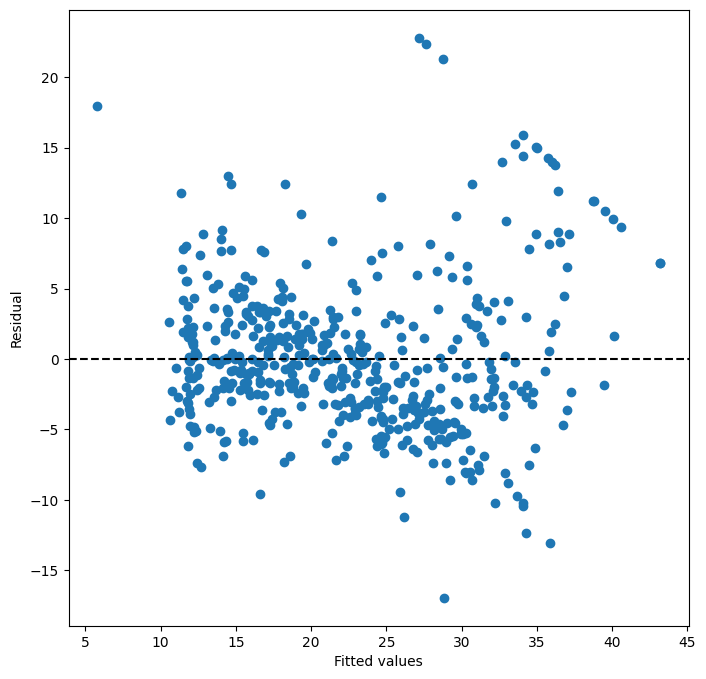

In [55]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [56]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [57]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [58]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')] # interaction terms
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In [60]:
X

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes],Income:Advertising,Price:Age
0,1.0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0,803.0,5040.0
1,1.0,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0,768.0,5395.0
2,1.0,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0,350.0,4720.0
3,1.0,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0,400.0,5335.0
4,1.0,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0,192.0,4864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0,1836.0,4224.0
396,1.0,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0,69.0,6600.0
397,1.0,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0,312.0,6360.0
398,1.0,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0,553.0,4750.0
